In [1]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

import pylab as plt

# Set a standard figure size to use
plt.rcParams['figure.figsize'] = (15.0, 15.0)

# LSST Science Pipelines (Stack) packages
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay

afwDisplay.setDefaultBackend('matplotlib')

In [2]:
repo = '/sdf/group/rubin/repo/main/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

In [3]:
for c in sorted(registry.queryCollections()):
    print(c)

--init-only
--register-dataset-types/20221215T212945Z
./afterburner-output/
./afterburner-output//20231003T200835Z
./output/bias_test0.fits
./output/bias_test0.fits/20220120T144009Z
/HSC/runs/PDR2/PDR2/v24.1.0.rc1_t0/ancillary
/HSC/runs/PDR2/PDR2/v24.1.0.rc1_t0/input
/home/cslage/test_bias2
/home/cslage/test_bias2/20210405T211811Z
/home/cslage/test_bias2/20210405T212011Z
/home/cslage/test_bias2/20210405T212258Z
/home/cslage/test_bias2/20210405T212359Z
/home/cslage/test_bias2/20210405T213443Z
/home/cslage/test_bias2/20210405T213821Z
/home/cslage/test_bias2/20210405T213943Z
/home/cslage/test_bias2/20210406T131430Z
/home/cslage/test_bias2/20210406T132539Z
/home/cslage/test_bias2/20210406T135132Z
/home/cslage/test_bias2/20210406T135259Z
/home/cslage/test_bias2/20210406T140400Z
/home/pferguso/jhome/projects/faro/faro_test
/home/pferguso/jhome/projects/faro/faro_test/20210906T162421Z
/home/s/shuang92/rubin-user/xtalk/7123D//bias
/home/s/shuang92/rubin-user/xtalk/7123D//bias/20230208T210503Z


In [4]:
for x in sorted(registry.queryDatasetTypes()):
    print(x)

DatasetType('AB1_config', {}, Config)
DatasetType('AB1_gatherResourceUsage_config', {}, Config)
DatasetType('AB1_gatherResourceUsage_log', {}, ButlerLogRecords)
DatasetType('AB1_gatherResourceUsage_metadata', {}, TaskMetadata)
DatasetType('AB1_log', {band, instrument, skymap, tract, patch}, ButlerLogRecords)
DatasetType('AB1_metadata', {band, instrument, skymap, tract, patch}, PropertySet)
DatasetType('AB1_resource_statistics', {}, DataFrame)
DatasetType('AB1_resource_usage', {}, DataFrame)
DatasetType('AD1_design_config', {}, Config)
DatasetType('AD1_design_gatherResourceUsage_config', {}, Config)
DatasetType('AD1_design_gatherResourceUsage_log', {}, ButlerLogRecords)
DatasetType('AD1_design_gatherResourceUsage_metadata', {}, TaskMetadata)
DatasetType('AD1_design_log', {band, instrument, skymap, tract}, ButlerLogRecords)
DatasetType('AD1_design_metadata', {band, instrument, skymap, tract}, PropertySet)
DatasetType('AD1_design_resource_usage', {}, DataFrame)
DatasetType('AD2_design_con

In [5]:
collection = 'LATISS/calib'
butler = dafButler.Butler(repo, collections=collection)
registry = butler.registry

In [11]:
datasetRefs = registry.queryDatasets(datasetType='bias', instrument='LATISS')
for i, ref in enumerate(datasetRefs):
    print(ref.dataId.full)
    #if i > 2:
     #   break

{instrument: 'LATISS', detector: 0}
{instrument: 'LATISS', detector: 0}
{instrument: 'LATISS', detector: 0}
{instrument: 'LATISS', detector: 0}
{instrument: 'LATISS', detector: 0}
{instrument: 'LATISS', detector: 0}


In [7]:
#raw_exps = sorted(registry.queryDatasets('raw', instrument='LATISS',where="exposure.science_program='LATISS_E6A' AND exposure.day_obs>20211001",collections=['LATISS/raw/all']))
#registry = raw_exps.registry

In [8]:
#collection = "LATISS/calib"
#butler = dafButler.Butler(repo, collections=collection)
#registry = butler.registry

In [10]:
for dim in ['exposure', 'detector']:
    print(list(registry.queryDimensionRecords(dim, where="instrument='LATISS' and detector=0"))[0])
    print()

exposure:
  instrument: 'LATISS'
  id: 2022062800004
  physical_filter: 'SDSSr~empty'
  obs_id: 'AT_O_20220628_000004'
  exposure_time: 0.0
  dark_time: 0.103406
  observation_type: 'bias'
  observation_reason: 'bias'
  day_obs: 20220628
  seq_num: 4
  seq_start: 4
  seq_end: 4
  group_name: '2022-06-28T17:03:59.508'
  group_id: 2363654395080000
  target_name: 'Park position'
  science_program: 'unknown'
  tracking_ra: None
  tracking_dec: None
  sky_angle: None
  azimuth: None
  zenith_angle: None
  has_simulated: False
  timespan: Timespan(begin=astropy.time.Time('2022-06-28 17:03:59.681996', scale='tai', format='iso'), end=astropy.time.Time('2022-06-28 17:03:59.693000', scale='tai', format='iso'))

detector:
  instrument: 'LATISS'
  id: 0
  full_name: 'RXX_S00'
  name_in_raft: 'RXX_S00'
  raft: None
  purpose: 'SCIENCE'



In [12]:
coaddId = {'exposure':2022062800004, 'detector.id':0}

In [14]:
image = butler.get('bias', dataId=coaddId)

(-0.5, 4071.5, -0.5, 3999.5)

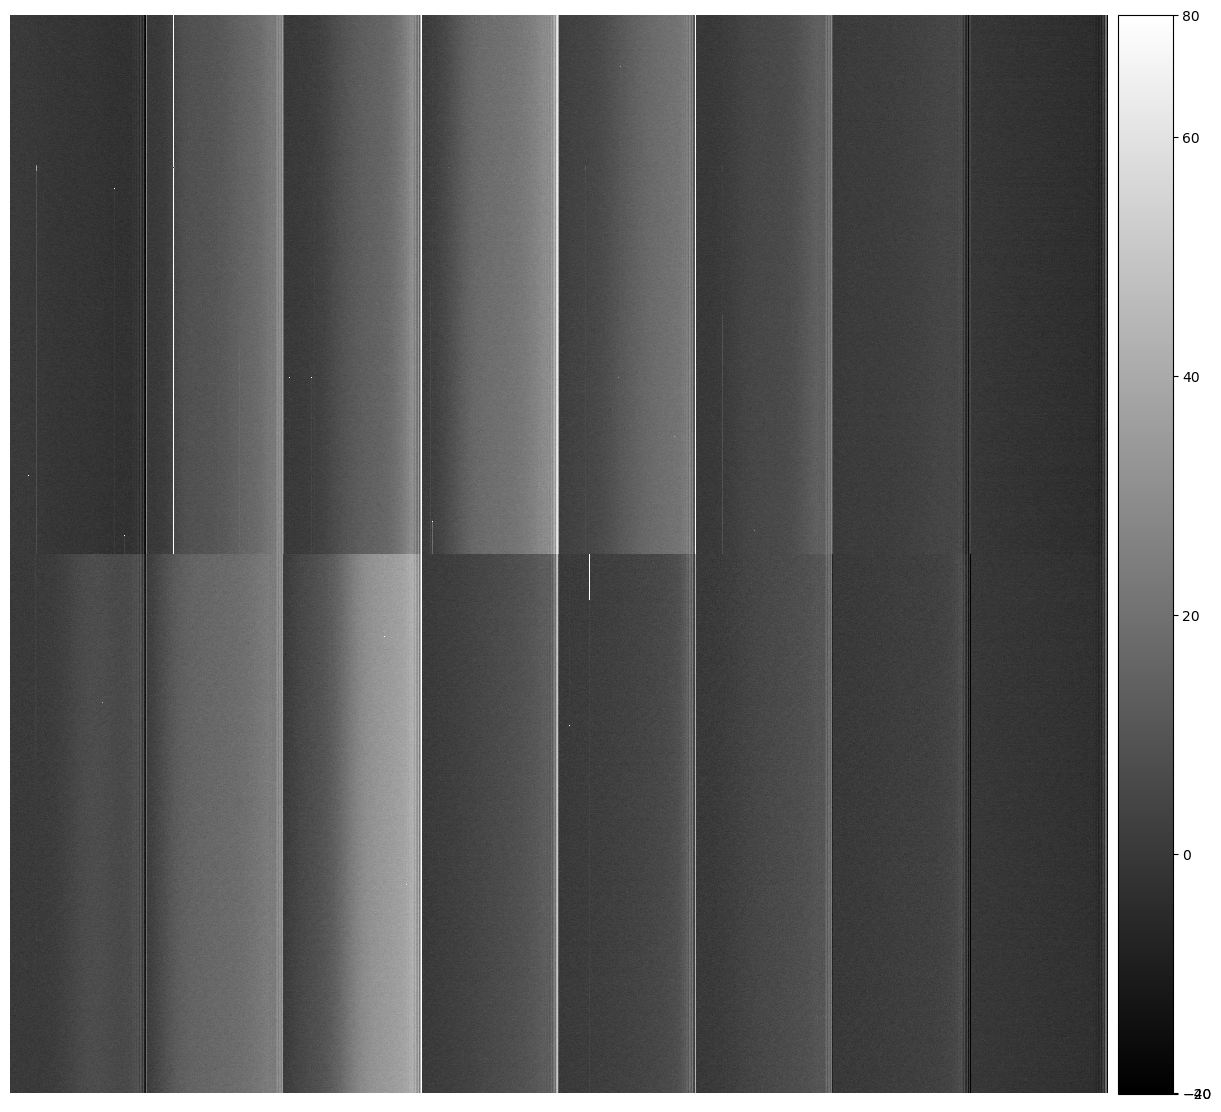

In [15]:
fig = plt.figure()
afw_display = afwDisplay.Display(1)
afw_display.scale('linear', 'zscale')
afw_display.mtv(image.image)
plt.gca().axis('off')

Full CCD image (includes overscan pixels): (columns,rows) = (4000, 4072)


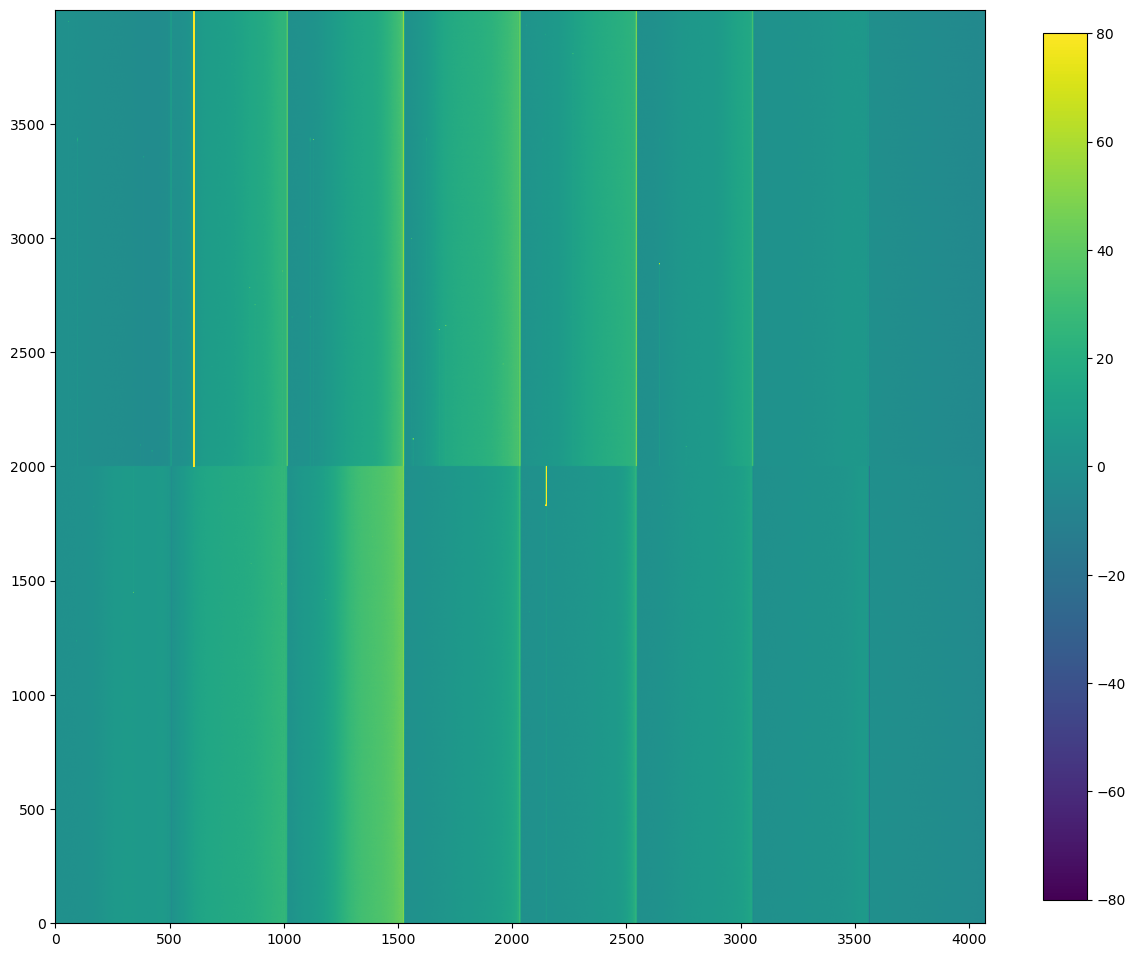

In [19]:
## What do these images look like?
# raw image
plt.figure()
# get full array
arr = image.getImage().getArray()
#norm = ImageNormalize(arr, interval=PercentileInterval(70.))
plt.imshow(arr, origin='lower', vmin=-80, vmax=80)#, norm = norm)
plt.colorbar(shrink=0.75)
#plt.savefig(output_data+'raw.png') 
print('Full CCD image (includes overscan pixels): (columns,rows) = ' + str(arr.shape))

Science image of one amplifier: (columns,rows) = (2000, 509)


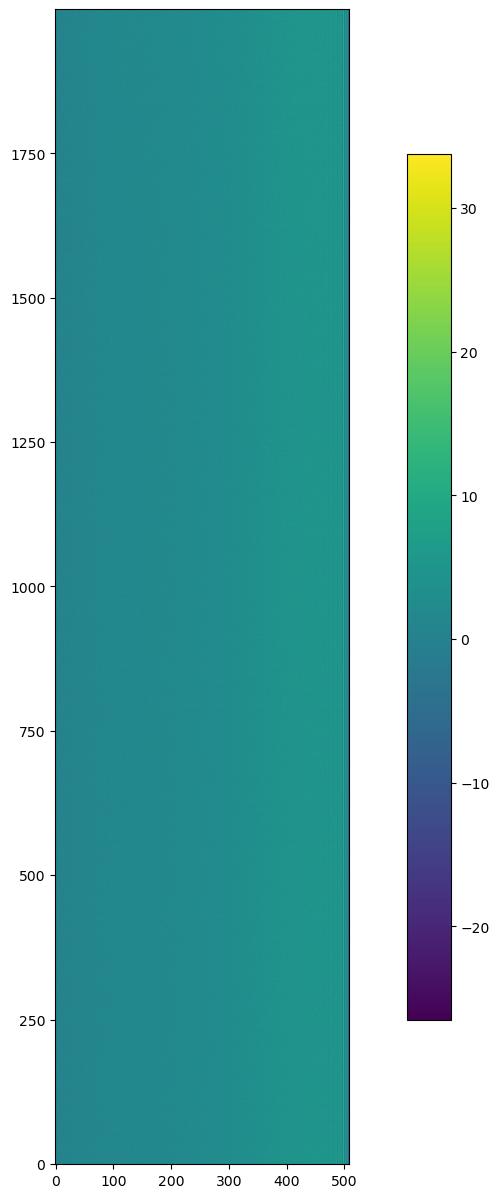

In [21]:
# per amp
detector = image.getDetector()
amplifier = detector['C16']
sub_im0 = image.getMaskedImage()[amplifier.getBBox()]
arr_amp = sub_im0.getImage().getArray()
#np.set_printoptions(threshold=sys.maxsize)
#print(arr_amp)
plt.imshow(arr_amp, origin='lower')#, vmin=13700, vmax=14000)
plt.colorbar(shrink = .75) 
#plt.savefig(output_data+'raw_amp.png')
print('Science image of one amplifier: (columns,rows) = ' + str(arr_amp.shape))